<a href="https://colab.research.google.com/github/manavbahuguna/manavbahuguna/blob/main/Handle_Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/data_science_job.csv')
df.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [ ]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [ ]:
cols = [ var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
df[cols].sample()

,city_development_index,enrolled_university,education_level,experience,training_hours
2427,0.91,no_enrollment,Phd,20.0,44.0


In [ ]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [ ]:
new_df = df[cols].dropna()
df.shape , new_df.shape


((19158, 13), (17182, 5))

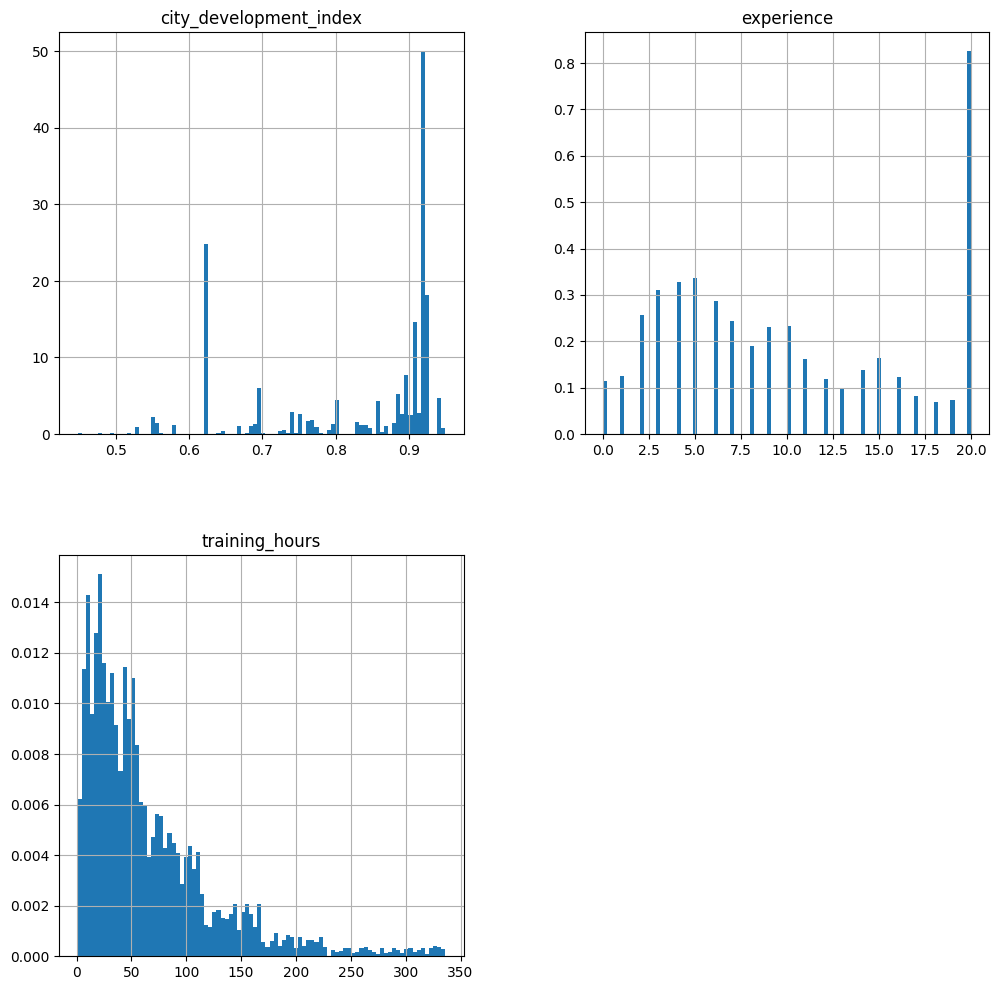

In [ ]:
new_df.hist(bins=90,density=True, figsize = (12,12))
plt.show()

<Axes: >

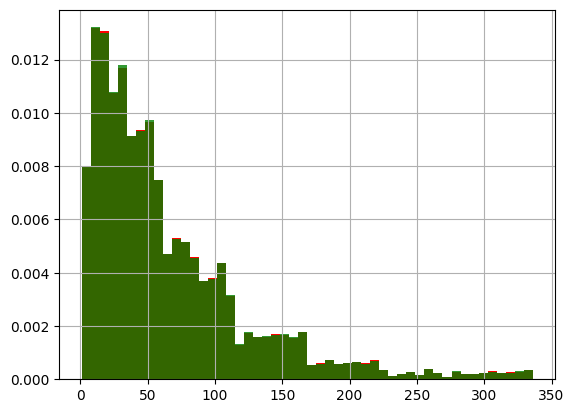

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['training_hours'].hist(bins=50,ax=ax,density = True,color = 'red')
new_df['training_hours'].hist(bins=50,ax=ax,density = True,color = 'green', alpha=0.8)

<Axes: ylabel='Density'>

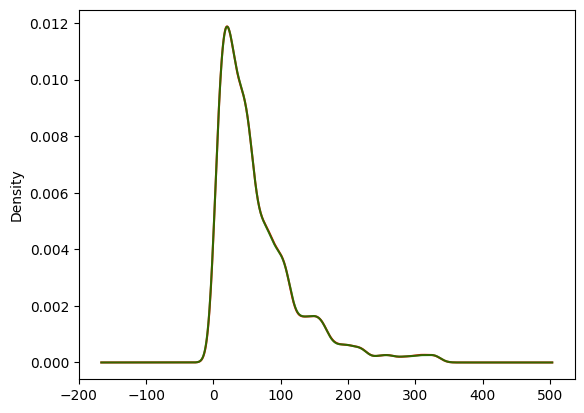

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['training_hours'].plot.density(color='red')
new_df['training_hours'].plot.density(color='green', alpha=0.8)

<Axes: ylabel='Density'>

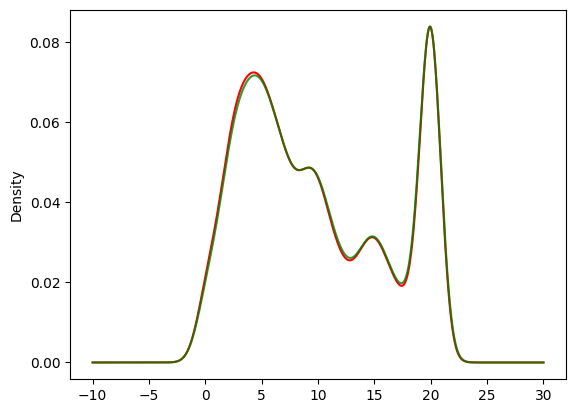

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['experience'].plot.density(color='red')
new_df['experience'].plot.density(color='green', alpha=0.8)